In [1]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def ParsenWindow(X,y,K,h,u):
    P = [K(((x[0]-u[0])**2 + (x[1]-u[1])**2)/h,1) for x in X]
    return np.argmax(np.bincount(y,P))

def K(x,l):
    if(x>l):
        return 0;
    else:
        return (l-x)/l;

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [4]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array([ParsenWindow(X,y,K,0.8,u) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

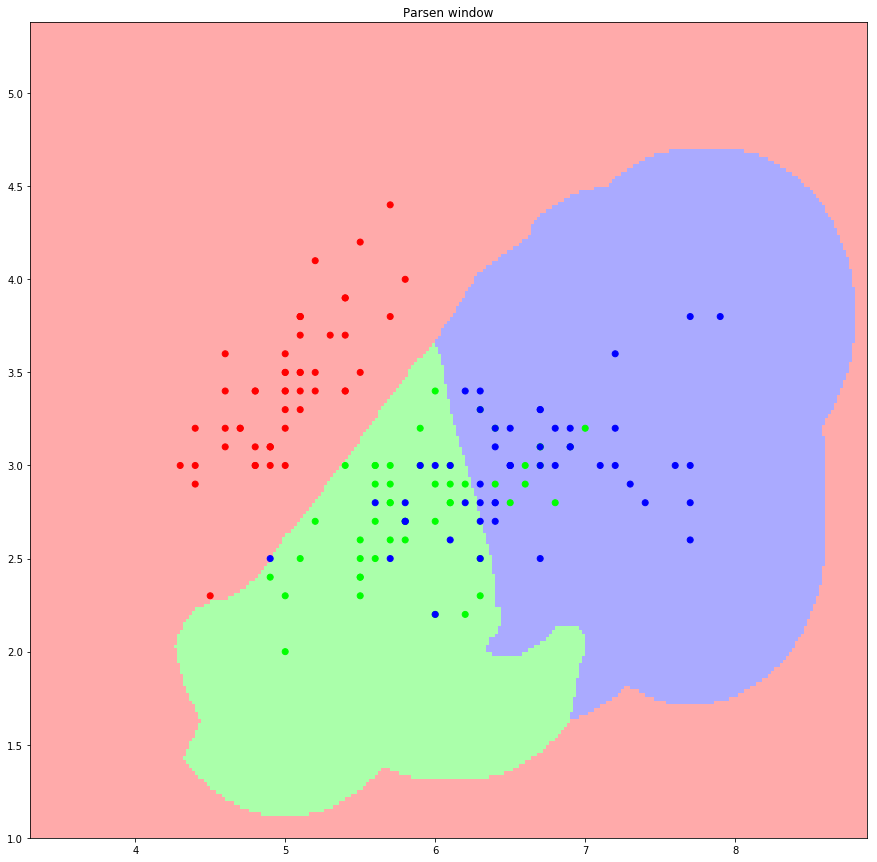

In [5]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Parsen window")
plt.show()